# Case Study 2 : How Can a Wellness Technology Company Play It Smart?

  As junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company.
Me and my team have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. What ever the insight we discover from product use data that help guide marketing strategy for the company. We have to present our analysis to the Bellabeat executive team along with high-level recommendations for Bellabeat’s marketing strategy.

# Data sources used

Company collect data from there company smart design product usage by their consumer. By analyzing the data usage, so that company executives will gain
insight into how people are already using their smart devices. Then, using this information, the decision maker's would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.

| Data Set | Description |
| --- | --- |
| dailyActivity_merged | Daily Activity Routine|
| SleepDay	| Total Sleep time on and Average consumer sleep |
| dailyIntensities_merged | The location point where the cyclist pickup cycle |
| dailySteps_merged | The location point where the cyclist ended cycle journey |


# Business Task:

- What are some trends in smart device usage?
- How could these trends apply to Bellabeat customers?
- How could these trends help influence Bellabeat marketing strategy?

# Metrics

# Data Tasks


# Recommendation for Action

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


import statsmodels.api as sm
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dailyActivity_merged = pd.read_csv("/content/drive/MyDrive/'blog in marathi/Capstone Folder 2/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleepDay_merged = pd.read_csv("/content/drive/MyDrive/'blog in marathi/Capstone Folder 2/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLogInfo_merged = pd.read_csv("/content/drive/MyDrive/'blog in marathi/Capstone Folder 2/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [ ]:
dailyActivity_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
sleepDay_merged.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [ ]:
weightLogInfo_merged.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [ ]:
dailyActivity_merged.shape, sleepDay_merged.shape, weightLogInfo_merged.shape

((940, 15), (413, 5), (67, 8))

In [ ]:
dailyActivity_merged.info(), sleepDay_merged.info(), weightLogInfo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

(None, None, None)

In [ ]:
dailyActivity_merged.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [ ]:
sleepDay_merged.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [ ]:
weightLogInfo_merged.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


In [ ]:
dailyActivity_merged.corr()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,1.000000,0.185721,0.241000,0.238816,0.188015,0.308691,0.026665,0.019629,-0.015698,0.303608,0.051158,-0.098754,-0.043319,0.396671
TotalSteps,0.185721,1.000000,0.985369,0.984822,0.181849,0.740115,0.507105,0.692208,0.070505,0.667079,0.498693,0.569600,-0.327484,0.591568
TotalDistance,0.241000,0.985369,1.000000,0.999505,0.188332,0.794582,0.470758,0.662002,0.082389,0.681297,0.462899,0.516300,-0.288094,0.644962
TrackerDistance,0.238816,0.984822,0.999505,1.000000,0.162585,0.794338,0.470277,0.661365,0.074591,0.680816,0.463154,0.514713,-0.289343,0.645313
LoggedActivitiesDistance,0.188015,0.181849,0.188332,0.162585,1.000000,0.150852,0.076527,0.138302,0.154996,0.234443,0.053860,0.102135,-0.046999,0.207595
VeryActiveDistance,0.308691,0.740115,0.794582,0.794338,0.150852,1.000000,0.192986,0.157669,0.046117,0.826681,0.211730,0.059845,-0.061754,0.491959
ModeratelyActiveDistance,0.026665,0.507105,0.470758,0.470277,0.076527,0.192986,1.000000,0.237847,0.005793,0.225464,0.946934,0.162092,-0.221436,0.216790
LightActiveDistance,0.019629,0.692208,0.662002,0.661365,0.138302,0.157669,0.237847,1.000000,0.099503,0.154966,0.220129,0.885697,-0.413552,0.466917
SedentaryActiveDistance,-0.015698,0.070505,0.082389,0.074591,0.154996,0.046117,0.005793,0.099503,1.000000,0.008258,-0.022361,0.124185,0.035475,0.043652
VeryActiveMinutes,0.303608,0.667079,0.681297,0.680816,0.234443,0.826681,0.225464,0.154966,0.008258,1.000000,0.312420,0.051926,-0.164671,0.615838


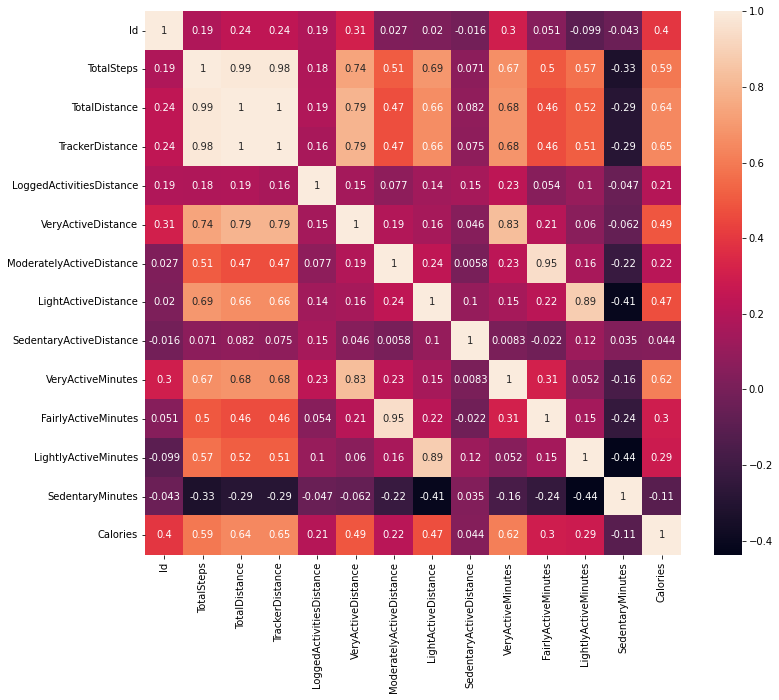

In [ ]:
annot = True
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(dailyActivity_merged.corr(), annot=annot)

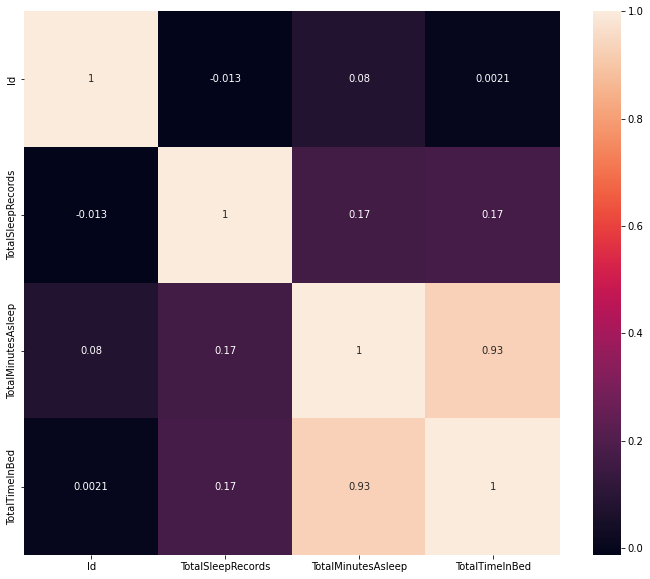

In [ ]:
annot = True
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(sleepDay_merged.corr(), annot=annot)

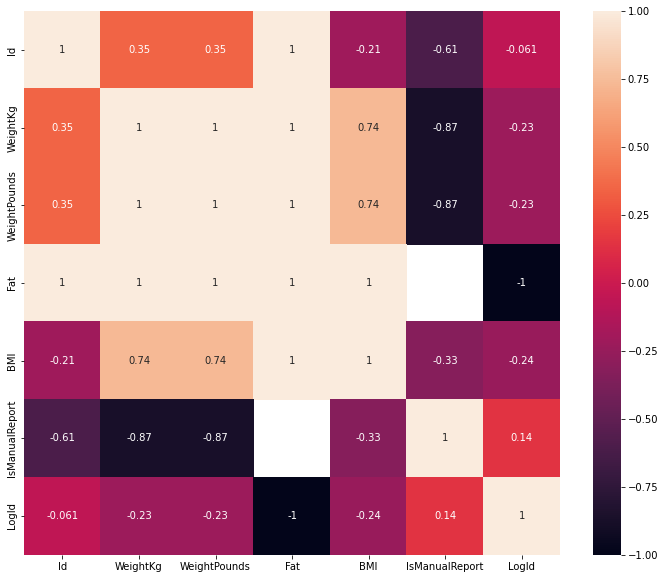

In [ ]:
annot = True
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(weightLogInfo_merged.corr(), annot=annot)

# Sorting data.


- ### DailyActivity_merged dataset

- Change the datatype of *ActivityDate* to timestamp.

In [ ]:
dailyActivity_merged['ActivityDate'] = pd.to_datetime(dailyActivity_merged['ActivityDate'])

- ### SleepDay_merged

In [ ]:
sleepDay_merged.drop('Id', inplace=True, axis=1)

- Change the datatype of SleepDay to timestamp.

In [ ]:
sleepDay_merged['SleepDay'] = pd.to_datetime(sleepDay_merged['SleepDay'])

In [ ]:
sleepDay_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SleepDay            413 non-null    datetime64[ns]
 1   TotalSleepRecords   413 non-null    int64         
 2   TotalMinutesAsleep  413 non-null    int64         
 3   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 13.0 KB


- #### weightLogInfo_merged dataset

In [ ]:
weightLogInfo_merged.drop(['LogId', 'IsManualReport', 'WeightPounds'], axis=1, inplace=True)

In [ ]:
weightLogInfo_merged.Fat.isnull().value_counts()

True     65
False     2
Name: Fat, dtype: int64

# Analyze Data

In [ ]:
dailyActivity_merged['TrackerDistance'].value_counts(), dailyActivity_merged['TotalDistance'].value_counts()

(0.000000     78
 2.600000      5
 0.010000      5
 3.910000      4
 2.680000      4
              ..
 2.460000      1
 5.330000      1
 5.820000      1
 9.490000      1
 19.559999     1
 Name: TrackerDistance, Length: 613, dtype: int64, 0.000000     78
 2.600000      5
 0.010000      5
 3.910000      4
 4.950000      4
              ..
 9.970000      1
 7.880000      1
 10.180000     1
 1.610000      1
 19.559999     1
 Name: TotalDistance, Length: 615, dtype: int64)

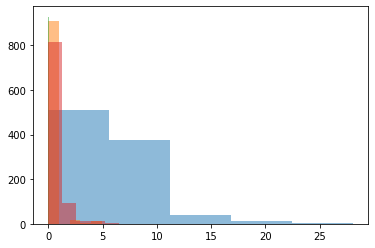

In [ ]:
bins = np.linspace(0, 10, 30)

plt.hist(dailyActivity_merged['TrackerDistance'], bins=5, alpha=0.5, label='Track Distance')
plt.hist(dailyActivity_merged['LoggedActivitiesDistance'], bins=5, alpha=0.5, label='Logged Activities Distance')
plt.hist(dailyActivity_merged['SedentaryActiveDistance'], bins=5, alpha=0.5, label='Sedentary Active Distance')
plt.hist(dailyActivity_merged['ModeratelyActiveDistance'], bins=5, alpha=0.5, label='Moderately Active Distance')
plt.show()

In [ ]:
dailyActivity_merged['TrackerDistance'].max(), dailyActivity_merged['LoggedActivitiesDistance'].max(), dailyActivity_merged['SedentaryActiveDistance'].max(), dailyActivity_merged['ModeratelyActiveDistance'].max()

(28.0300006866455, 4.94214200973511, 0.109999999403954, 6.48000001907349)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


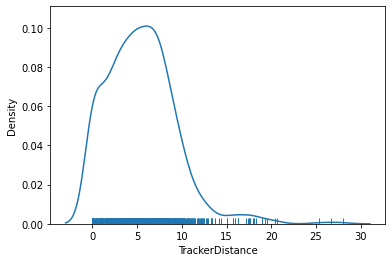

In [ ]:
sns.distplot(dailyActivity_merged['TrackerDistance'], hist=False, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


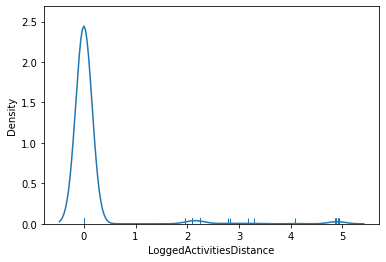

In [ ]:
sns.distplot(dailyActivity_merged['LoggedActivitiesDistance'], hist=False, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


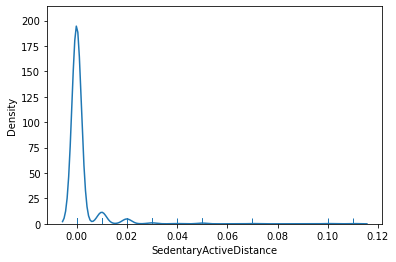

In [ ]:
sns.distplot(dailyActivity_merged['SedentaryActiveDistance'], hist=False, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


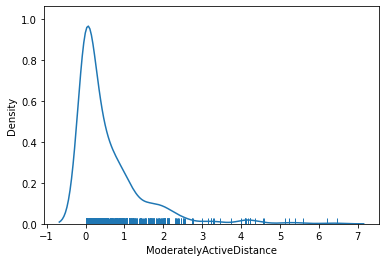

In [ ]:
sns.distplot(dailyActivity_merged['ModeratelyActiveDistance'], hist=False, rug=True)

- Data is more **Right-skwed** whether is ModerateActiveDistance, SedantaryActiveDistance, LoggedActivitiesDistance, Trackdistance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

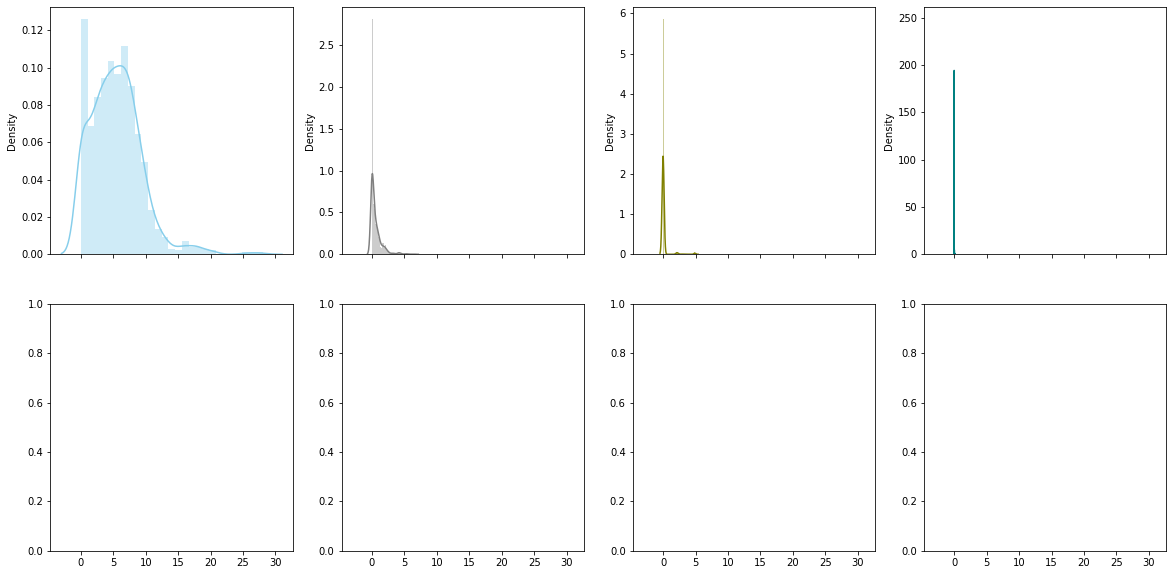

In [ ]:
f, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True)
sns.distplot( dailyActivity_merged['TrackerDistance'] , color="skyblue", ax=axes[0, 0])
sns.distplot( dailyActivity_merged['ModeratelyActiveDistance'] , color="grey", ax=axes[0, 1])
sns.distplot( dailyActivity_merged['LoggedActivitiesDistance'] , color="olive", ax=axes[0, 2])
sns.distplot( dailyActivity_merged['SedentaryActiveDistance'] , color="teal", ax=axes[0, 3])

- Number of consumer involve in daily activity are towards Sedantary then Active involment whether it is distance, time, steps and Calories burning.

In [ ]:
days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

dailyActivity_merged['WeekDay'] = dailyActivity_merged['ActivityDate'].apply(lambda x: days[x.weekday()])

- According to Pareto Principle our 80% of output from 20% effort on work.
- So in order to increase our cosumer Activity involment in Daily workout and burn out maximum Calories, we will focus on those attribute which force consumer involve VeryActively.

In [ ]:
active_mean_distance = []
parameter = 'VeryActiveDistance'
for i in range(len(days)):
  active_mean = dailyActivity_merged[dailyActivity_merged['WeekDay'] == days[i]][parameter].mean()
  active_mean_distance.append(active_mean)
df_mean_dist = pd.DataFrame(active_mean_distance, columns = ['active_mean_day'])

In [ ]:
df_mean_dist['Days'] = days
active_mean_distance = []
parameter = 'Calories'
column = ['Calories_mean']
for i in range(len(days)):
  active_mean = dailyActivity_merged[dailyActivity_merged['WeekDay'] == days[i]][parameter].mean()
  active_mean_distance.append(active_mean)

df_mean_dist['Calories_mean'] = active_mean_distance

,active_mean_day,Days,Calories_mean
0,1.537333,Monday,2324.208333
1,1.613289,Tuesday,2356.013158
2,1.633467,Wednesday,2302.620000
3,1.390476,Thursday,2199.571429
4,1.312937,Friday,2331.785714
5,1.514597,Saturday,2354.967742
6,1.488926,Sunday,2263.000000


In [ ]:
parameter = 'TotalSteps'
column = ['TotalSteps_mean']
active_mean_distance = []
for i in range(len(days)):
  active_mean = dailyActivity_merged[dailyActivity_merged['WeekDay'] == days[i]][parameter].mean()
  active_mean_distance.append(active_mean)
  # print(active_mean_distance)
df_mean_dist[column[0]] = active_mean_distance

,active_mean_day,Days,Calories_mean,TotalSteps_mean
0,1.537333,Monday,2324.208333,7780.866667
1,1.613289,Tuesday,2356.013158,8125.006579
2,1.633467,Wednesday,2302.620000,7559.373333
3,1.390476,Thursday,2199.571429,7405.836735
4,1.312937,Friday,2331.785714,7448.230159
5,1.514597,Saturday,2354.967742,8152.975806
6,1.488926,Sunday,2263.000000,6933.231405


In [ ]:
parameter = 'TrackerDistance'
column = ['TrackerDistance_mean']
active_mean_distance = []
for i in range(len(days)):
  active_mean = dailyActivity_merged[dailyActivity_merged['WeekDay'] == days[i]][parameter].mean()
  active_mean_distance.append(active_mean)

df_mean_dist[column[0]] = active_mean_distance

,active_mean_day,Days,Calories_mean,TotalSteps_mean,TrackerDistance_mean
0,1.537333,Monday,2324.208333,7780.866667,5.528750
1,1.613289,Tuesday,2356.013158,8125.006579,5.812829
2,1.633467,Wednesday,2302.620000,7559.373333,5.467600
3,1.390476,Thursday,2199.571429,7405.836735,5.287415
4,1.312937,Friday,2331.785714,7448.230159,5.302936
5,1.514597,Saturday,2354.967742,8152.975806,5.854677
6,1.488926,Sunday,2263.000000,6933.231405,5.027190


In [ ]:
parameter = 'TrackerDistance'
column = ['TrackerDistance_mean']
active_mean_distance = []
for i in range(len(days)):
  active_mean = dailyActivity_merged[dailyActivity_merged['WeekDay'] == days[i]][parameter].mean()
  active_mean_distance.append(active_mean)

df_mean_dist[column[0]] = active_mean_distance

,active_mean_day,Days,Calories_mean,TotalSteps_mean,TrackerDistance_mean
0,1.537333,Monday,2324.208333,7780.866667,5.528750
1,1.613289,Tuesday,2356.013158,8125.006579,5.812829
2,1.633467,Wednesday,2302.620000,7559.373333,5.467600
3,1.390476,Thursday,2199.571429,7405.836735,5.287415
4,1.312937,Friday,2331.785714,7448.230159,5.302936
5,1.514597,Saturday,2354.967742,8152.975806,5.854677
6,1.488926,Sunday,2263.000000,6933.231405,5.027190


In [ ]:
parameter = 'VeryActiveMinutes'
column = ['VeryActiveMinutes']
active_mean_distance = []
for i in range(len(days)):
  active_mean = dailyActivity_merged[dailyActivity_merged['WeekDay'] == days[i]][parameter].mean()
  active_mean_distance.append(active_mean)

df_mean_dist[column[0]] = active_mean_distance

,active_mean_day,Days,Calories_mean,TotalSteps_mean,TrackerDistance_mean,VeryActiveMinutes
0,1.537333,Monday,2324.208333,7780.866667,5.528750,23.108333
1,1.613289,Tuesday,2356.013158,8125.006579,5.812829,22.953947
2,1.633467,Wednesday,2302.620000,7559.373333,5.467600,20.780000
3,1.390476,Thursday,2199.571429,7405.836735,5.287415,19.408163
4,1.312937,Friday,2331.785714,7448.230159,5.302936,20.055556
5,1.514597,Saturday,2354.967742,8152.975806,5.854677,21.919355
6,1.488926,Sunday,2263.000000,6933.231405,5.027190,19.983471


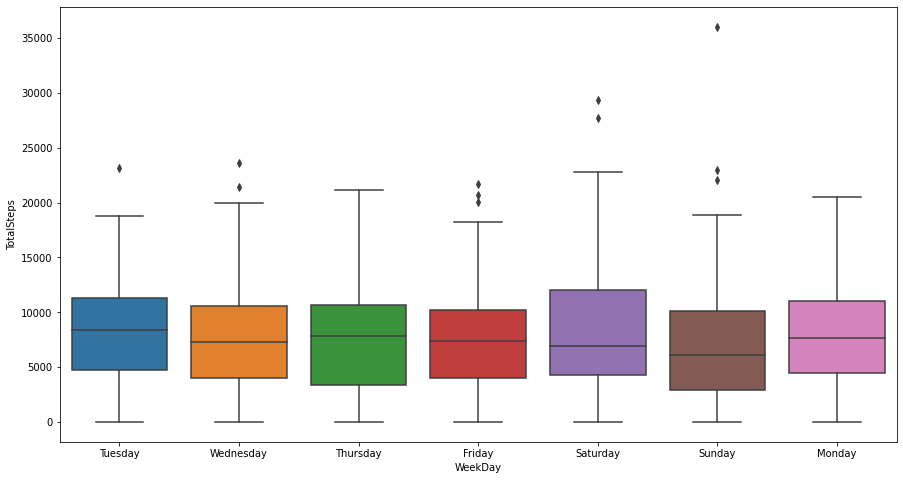

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='WeekDay', y='TotalSteps', data=dailyActivity_merged)

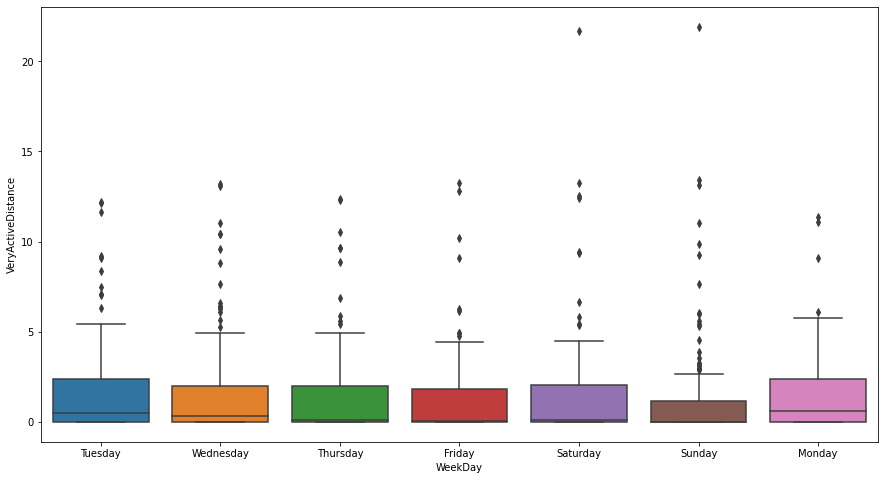

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='WeekDay', y='VeryActiveDistance', data=dailyActivity_merged)

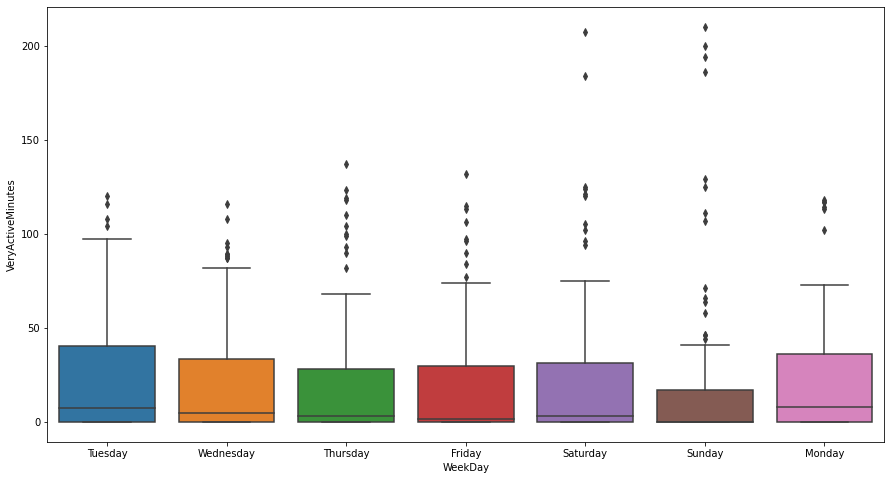

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='WeekDay', y='VeryActiveMinutes', data=dailyActivity_merged)

In [ ]:
df_mean_dist.head()

,active_mean_day,Days,Calories_mean,TotalSteps_mean,TrackerDistance_mean,VeryActiveMinutes
0,1.537333,Monday,2324.208333,7780.866667,5.528750,23.108333
1,1.613289,Tuesday,2356.013158,8125.006579,5.812829,22.953947
2,1.633467,Wednesday,2302.620000,7559.373333,5.467600,20.780000
3,1.390476,Thursday,2199.571429,7405.836735,5.287415,19.408163
4,1.312937,Friday,2331.785714,7448.230159,5.302936,20.055556


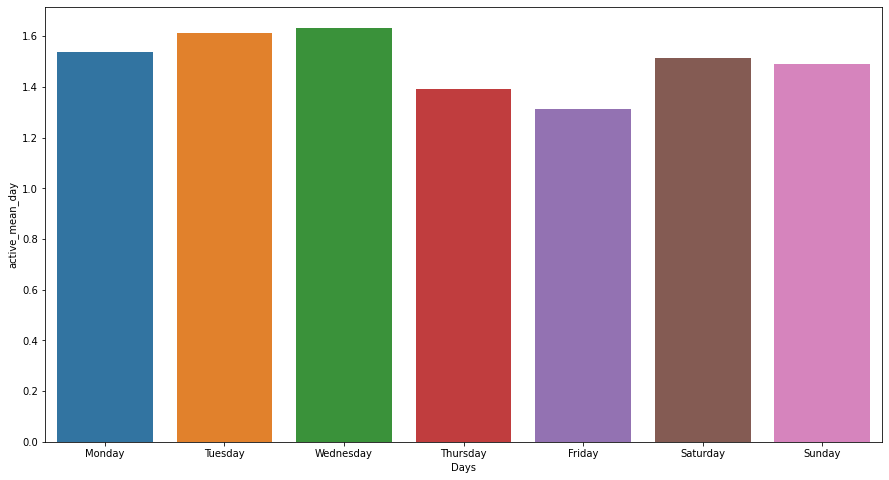

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Days", y="active_mean_day", data=df_mean_dist)

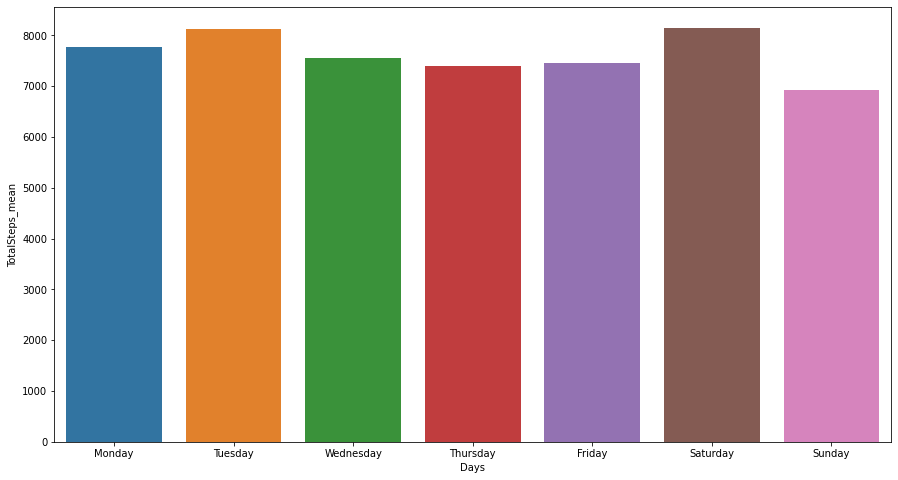

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Days", y="TotalSteps_mean", data=df_mean_dist)

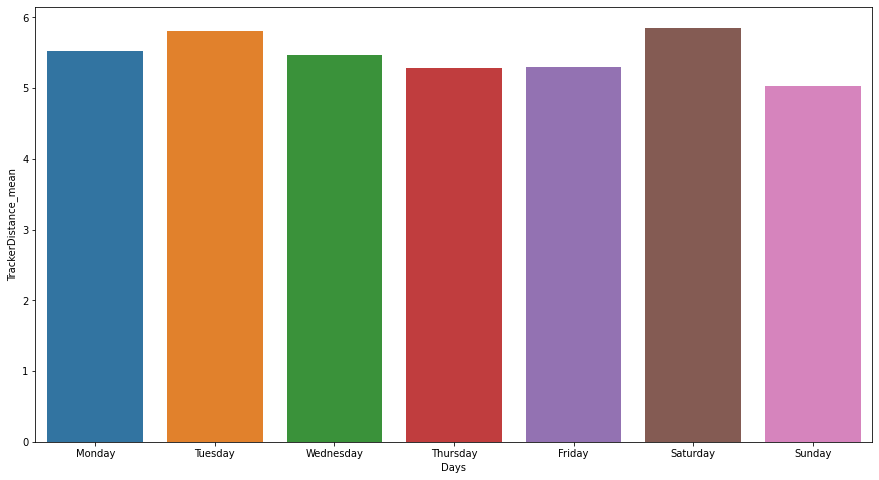

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Days", y="TrackerDistance_mean", data=df_mean_dist)

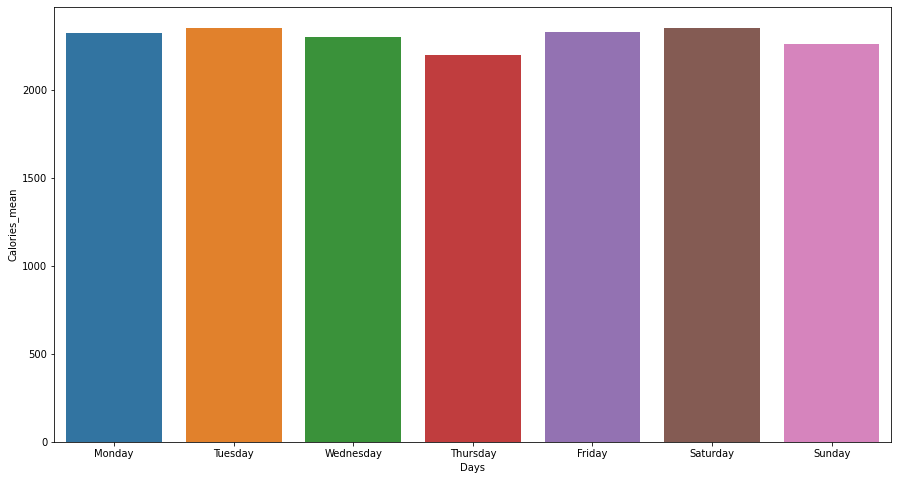

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Days", y="Calories_mean", data=df_mean_dist)

- From the *Weekday* vs *VeryActiveMinutes* consumer were more actively involve on **Monday**, **Tuesday**, **Satarday**.
- And Less number minues involve in daily workout on **Sunday**, **Wednesday** and **Thursday**.
- But when we plot bargraph of Avery Active Parameter **distance**, **Minutes**, **TotalSteps**. Consumer were more actively involve in workout for more number of minutes, more steps & Distance on **Monday**, **Tuesday** and **Saturday**. As of they were more motivate by Weekend refreshment before and after. 

## Analyze of data by finding correlation between attributes

#### Finding a corelation between **Calories** and **TotalSteps**

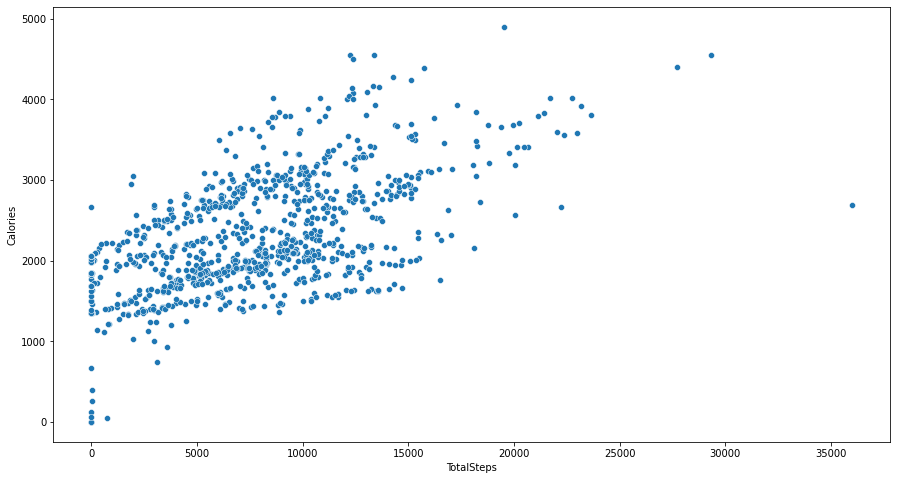

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = dailyActivity_merged, x = 'TotalSteps', y ='Calories')

- The Total Number of steps a user do is positively related to Calories Burn each.
- So some how we motivate user to maximum number of step, more the the user will get motivation to burn their calories.

### Finding relation strength between **Calories** vs **ModeratelyActiveDistance** and **Calories** vs **VeryActiveDistance**

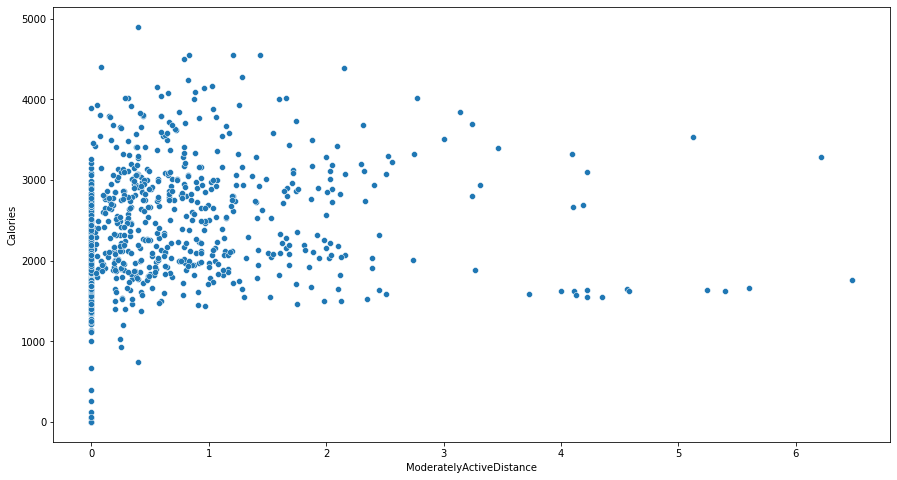

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = dailyActivity_merged, x = 'ModeratelyActiveDistance', y ='Calories')

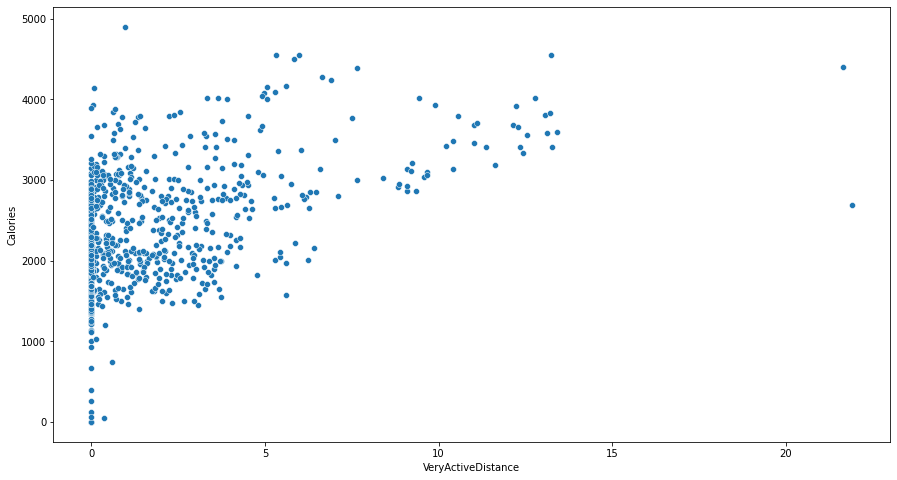

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x= dailyActivity_merged['VeryActiveDistance'], y=dailyActivity_merged['Calories'])

- The positive Strength of Correlation between VeryActiveDistance vs Calories is more compare to the Correlation between ModeratelyActiveDistance vs Calories.
- So increasing more time of user on VeryActiveDistance, user will be able to burn more Calories.

# sleepDay_merged Data Analysis:

In [ ]:
sleepDay_merged.head()

,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,2016-04-12,1,327,346
1,2016-04-13,2,384,407
2,2016-04-15,1,412,442
3,2016-04-16,2,340,367
4,2016-04-17,1,700,712


In [ ]:
sleepDay_merged.TotalSleepRecords.value_counts()

1    367
2     43
3      3
Name: TotalSleepRecords, dtype: int64

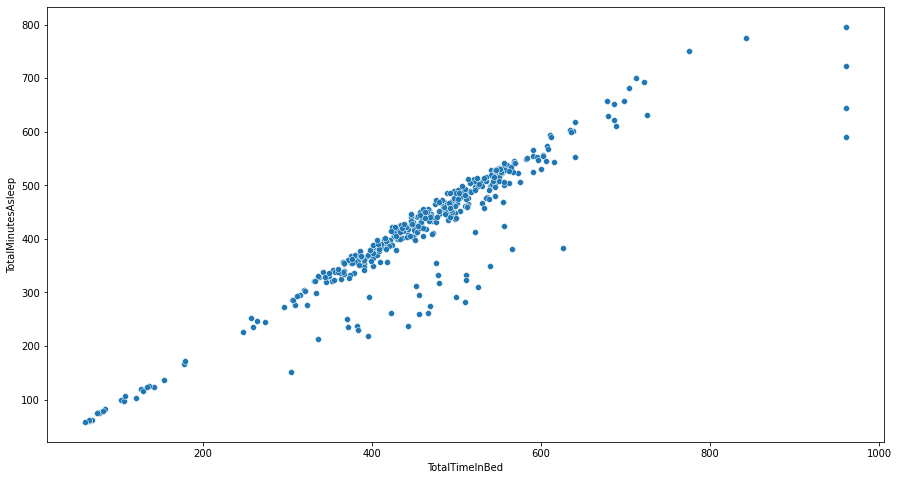

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="TotalTimeInBed", y="TotalMinutesAsleep", data=sleepDay_merged)

In [ ]:
sleepDay_merged['TotalSleepRecords'].value_counts()

1    367
2     43
3      3
Name: TotalSleepRecords, dtype: int64

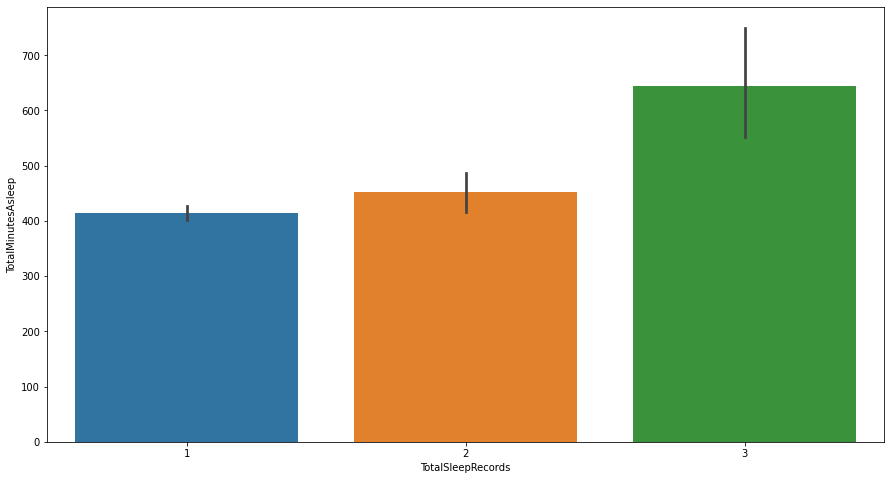

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="TotalSleepRecords", y="TotalMinutesAsleep", data=sleepDay_merged)

In [ ]:
sleepDay_merged['dfference'] = sleepDay_merged['TotalTimeInBed'] - sleepDay_merged['TotalMinutesAsleep']

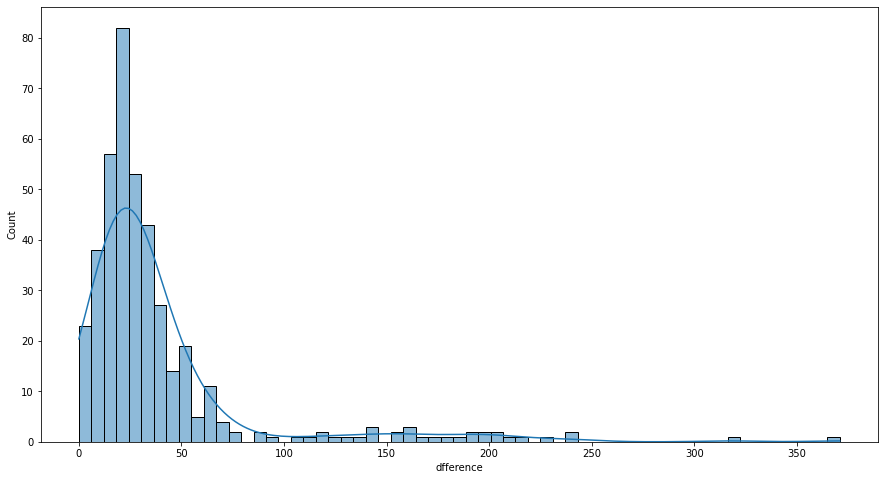

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(sleepDay_merged['dfference'], kde=True)

- Their is direct positive relation between TotalInBed and TotalMinutesAsleep.
- Some how we decrease TotalInBed time duration the more user will able to get involve into the Workout routine in morning.

# Conclusion and Recommendations

- Overall, we see that many Bellabeat customers value the use of the fitness tracker. These customers are very health conscious and have a great appreciation for tracking their fitness and health statistics. This is a great way for the customers to set goals and hold themselves accountable. Bellabeat can allow their users to set daily/monthly targets, keep track of those targets and provide digital awards once those targets are met. The awards can be a digital image of an award, points to purchase add-ons (free bracelet, pendant for necklace, watch straps, or even replacement of old water bottle),or even provide priority passes to future events.

- Lastly, Bellabeat can use the recommendations to reach various target audiences. They can tailor the strategies to make it feel more personal and offer features based on what individuals preference. Furthermore, to promote overall heatlh Bellabeat should encourage their users to continously track their sleep patterns and make the wearable devices comfortable for their users to sleep in.